In [109]:
import pandas as pd 

In [110]:
bitcoin_df = pd.read_csv('datasets/bitcoin_dataset_metrics.csv', parse_dates=['Date'])
bitcoin_df = bitcoin_df.set_index('Date')
bitcoin_df.rename(columns={'btc_market_price':'Price'}, inplace=True)
bitcoin_df.head()

,Price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-17,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
2010-02-18,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2010-02-19,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
2010-02-20,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
2010-02-21,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [111]:
print(bitcoin_df.columns)

Index(['Price', 'btc_total_bitcoins', 'btc_market_cap', 'btc_trade_volume',
       'btc_blocks_size', 'btc_avg_block_size', 'btc_n_orphaned_blocks',
       'btc_n_transactions_per_block', 'btc_median_confirmation_time',
       'btc_hash_rate', 'btc_difficulty', 'btc_miners_revenue',
       'btc_transaction_fees', 'btc_cost_per_transaction_percent',
       'btc_cost_per_transaction', 'btc_n_unique_addresses',
       'btc_n_transactions', 'btc_n_transactions_total',
       'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')


In [112]:
cols_to_keep = ['Price', 'btc_trade_volume', 'btc_hash_rate', 'btc_n_transactions_total',
                'btc_n_transactions_excluding_popular', 'btc_n_transactions_excluding_chains_longer_than_100',
                'btc_estimated_transaction_volume_usd', 'btc_difficulty', 'btc_cost_per_transaction_percent']

bitcoin_df = bitcoin_df[cols_to_keep]

In [113]:
cols_to_lag = [col for col in bitcoin_df.columns if col not in ['Date', 'Price']]

for col in cols_to_lag:
    bitcoin_df[f'{col}_lag1'] = bitcoin_df[col].shift(1)
    bitcoin_df.drop(col, axis=1, inplace=True)

bitcoin_df = bitcoin_df.dropna()
bitcoin_df.head()

,Price,btc_trade_volume_lag1,btc_hash_rate_lag1,btc_n_transactions_total_lag1,btc_n_transactions_excluding_popular_lag1,btc_n_transactions_excluding_chains_longer_than_100_lag1,btc_estimated_transaction_volume_usd_lag1,btc_difficulty_lag1,btc_cost_per_transaction_percent_lag1
Date,,,,,,,,,
2010-02-18,0.0,0.0,0.000029,41240.0,244.0,244.0,0.0,2.527738,31.781022
2010-02-19,0.0,0.0,0.000029,41475.0,235.0,235.0,0.0,2.527738,154.463801
2010-02-20,0.0,0.0,0.000023,41658.0,183.0,183.0,0.0,2.527738,1278.516635
2010-02-21,0.0,0.0,0.000028,41882.0,224.0,224.0,0.0,2.527738,22186.687990
2010-02-22,0.0,0.0,0.000027,42100.0,218.0,218.0,0.0,2.527738,689.179876


In [114]:
print(bitcoin_df.columns)

Index(['Price', 'btc_trade_volume_lag1', 'btc_hash_rate_lag1',
       'btc_n_transactions_total_lag1',
       'btc_n_transactions_excluding_popular_lag1',
       'btc_n_transactions_excluding_chains_longer_than_100_lag1',
       'btc_estimated_transaction_volume_usd_lag1', 'btc_difficulty_lag1',
       'btc_cost_per_transaction_percent_lag1'],
      dtype='object')


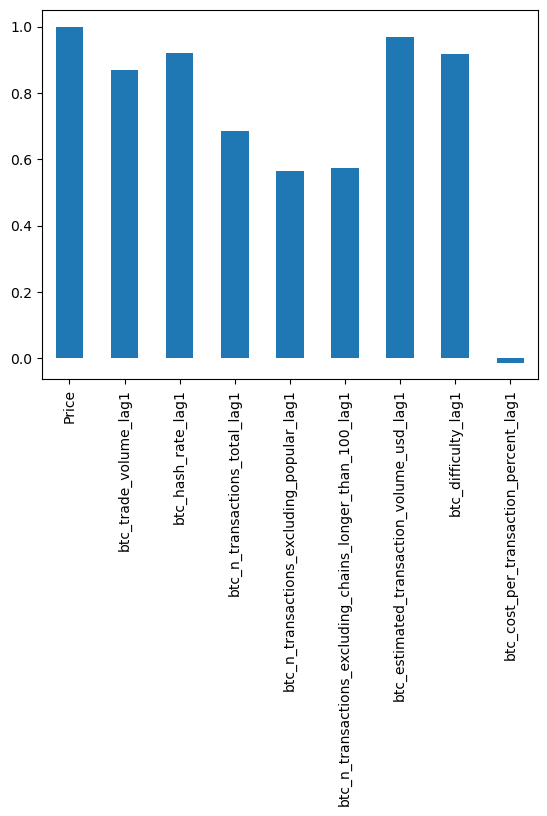

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = bitcoin_df.corr()
btc_market_price_corr = corr_matrix['Price']
btc_market_price_corr.plot(kind='bar')
plt.show()

In [116]:
lag_count = 30
for i in range(lag_count,0,-1):
    bitcoin_df['t='+str(i)] = bitcoin_df['Price'].shift(i)

bitcoin_df = bitcoin_df.dropna()
bitcoin_df.head()

,Price,btc_trade_volume_lag1,btc_hash_rate_lag1,btc_n_transactions_total_lag1,btc_n_transactions_excluding_popular_lag1,btc_n_transactions_excluding_chains_longer_than_100_lag1,btc_estimated_transaction_volume_usd_lag1,btc_difficulty_lag1,btc_cost_per_transaction_percent_lag1,t=30,...,t=10,t=9,t=8,t=7,t=6,t=5,t=4,t=3,t=2,t=1
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-20,0.0,0.0,0.000030,46449.0,144.0,144.0,0.0,4.531082,75.396825,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-21,0.0,0.0,0.000044,46652.0,203.0,203.0,0.0,4.531082,249.612002,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-22,0.0,0.0,0.000041,46843.0,191.0,191.0,0.0,4.531082,577.536694,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-23,0.0,0.0,0.000040,47029.0,186.0,186.0,0.0,4.565163,333.962264,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-24,0.0,0.0,0.000046,47244.0,215.0,215.0,0.0,4.565163,276.771201,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
#Create weekday, month, and year features
bitcoin_df['weekday'] = bitcoin_df.index.weekday
bitcoin_df['month'] = bitcoin_df.index.month
bitcoin_df['year'] = bitcoin_df.index.year

In [118]:
forecast_length = 30
train = bitcoin_df.iloc[:-forecast_length]
test = bitcoin_df.iloc[-forecast_length:]

In [119]:
from sklearn.model_selection import train_test_split

X = train.drop('Price', axis=1)
y = train['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [120]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [121]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=300, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=300, random_state=42)

In [122]:
from sklearn.metrics import mean_absolute_percentage_error

y_pred = rf_model.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)*100

42564519097416.87

In [123]:
def make_predictions(model):
    X_test = test.drop('Price', axis=1)
    y_pred = model.predict(X_test)
    
    return y_pred

In [124]:
test_prediction_rf = make_predictions(rf_model)

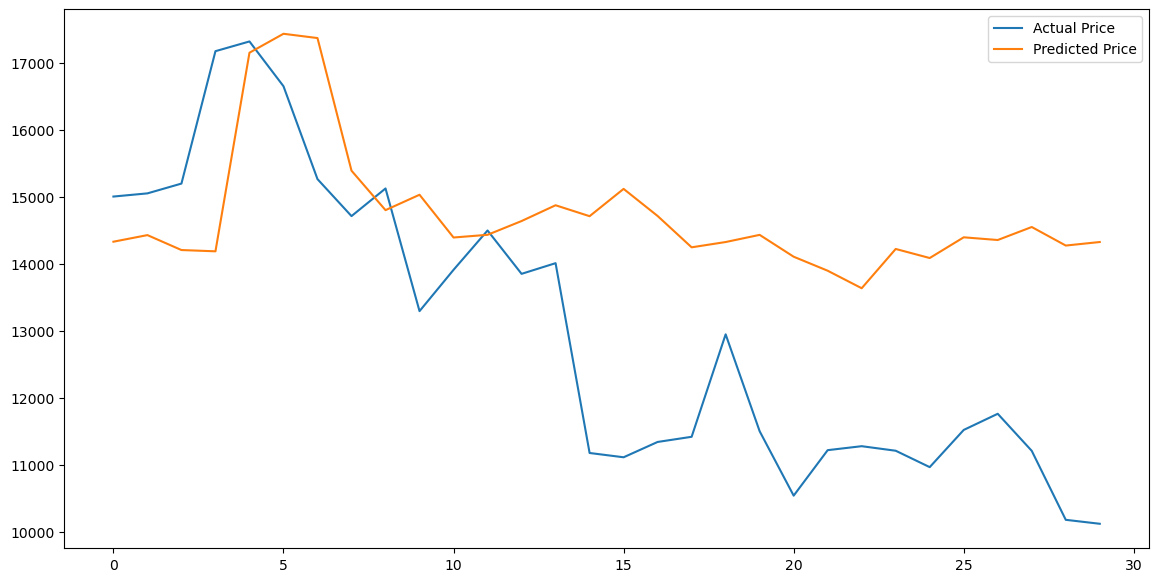

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(test['Price'].values, label='Actual Price')
plt.plot(test_prediction_rf, label='Predicted Price')
plt.legend()

plt.show()